In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance1.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
df["insuranceclaim"].unique()

array([1, 0], dtype=int64)

In [8]:
df.shape

(1338, 8)

In [9]:
# How many samples of 1's and 0's in output column.

df["insuranceclaim"].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

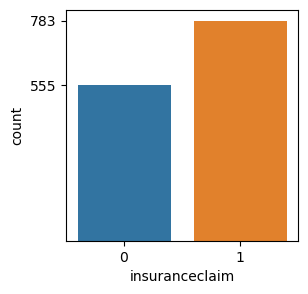

In [10]:
plt.figure(figsize= (3,3))
f=df["insuranceclaim"].value_counts()
sns.countplot(data= df, x= "insuranceclaim")
plt.yticks(f)
plt.show()

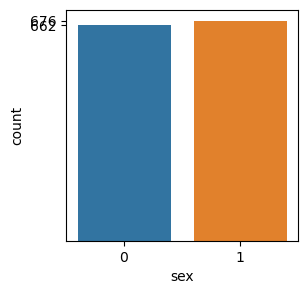

In [11]:
plt.figure(figsize= (3,3))
sns.countplot(data= df, x= "sex")
f= df["sex"].value_counts()
plt.yticks(f)
plt.show()

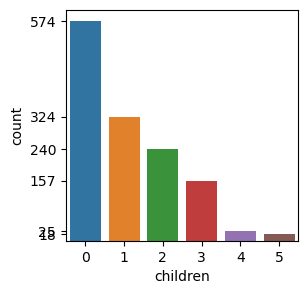

In [12]:
plt.figure(figsize= (3,3))
sns.countplot(data= df, x= "children")
f= df["children"].value_counts()
plt.yticks(f)
plt.show()

In [13]:
print(f)

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
0    1064
1     274
Name: count, dtype: int64


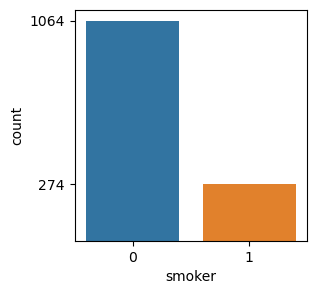

In [14]:
plt.figure(figsize= (3,3))
sns.countplot(data= df, x= "smoker")
f= df["smoker"].value_counts()
plt.yticks(f)
print(f)
plt.show()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


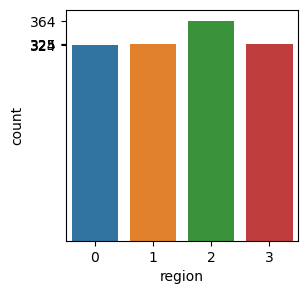

In [15]:
plt.figure(figsize= (3,3))
sns.countplot(data= df, x= "region")
f= df["region"].value_counts()
plt.yticks(f)
print(f)
plt.show()

In [16]:
# Apply cleaning process means EDA
# Step1: to check null values.
# step 2: to check data types.
# step 3: to visualize null values.
# step 4: to check duplicate rows/records in given dataset.

In [17]:
# To show duplicate records
df.duplicated().sum()

1

In [18]:
# To remove duplicates rows permanently.
df.drop_duplicates(inplace= True)

In [19]:
# Seperate input and output from given dataframe df
X= df.drop("insuranceclaim", axis= 1) # input 2D
Y= df["insuranceclaim"] # Output: 1D

In [20]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [22]:
#Train and split data 70% and 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state= 1)

In [23]:
x_train.shape, y_train.shape

((935, 7), (935,))

In [24]:
x_test.shape, y_test.shape

((402, 7), (402,))

In [25]:
#use StandardScaler Class
#Apply Scaling on Input Column Of Both X_train and X_test
from sklearn.preprocessing import StandardScaler
#Create the object of StandardSacaler
ss= StandardScaler()
#Apply the StandardScaler on training data
x_train= ss.fit_transform(x_train)
x_test= ss.transform(x_test)

In [26]:
x_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [27]:
# Perform the model with the help of Logistic Regression(type of Classification Alogorithm)
# Call Logistic Regression inbuilt class
from sklearn.linear_model import LogisticRegression

#create the object of LogisticRegression class
lor= LogisticRegression()

In [28]:
lor.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred= lor.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
#Create a new dataframe which hold Y_test (Actual Output) and Y_pred 
#Predicted output
dict={"Actual Output":y_test,"Predicted Output":y_pred}
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [31]:
#Evaluation of model is classification Alforithm :-
#1.Confusion Matrix :-

In [32]:
 from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test,y_pred))

[[147  25]
 [ 21 209]]


In [34]:
#   TP  FP
#[[147  25]
# [ 21 209]]
#   FN  TN

In [35]:
147/168

0.875

In [36]:
 #Generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [37]:
#Here Recall=0.91 means 91% Good Score
#But we can improve this score even more.

In [38]:
#Limitation of Logistic Regression :IT is a not select input features
#to predict the output ,means the model tends to overfit.

#So,here we use the second algorithm for classifiction in this dataset
#2.DecisionTreeClassifier:-
#Advantages of DecisionTreeClassifier Algorithm :-
#To select the important input features to predict the output automatic.
#With the help of gini index / Entropy method

In [39]:
#Use DecisionTreeClassifier inbuilt class
from sklearn.tree import DecisionTreeClassifier

In [40]:
#Create the objet of DecisionTreeClassifier class
dtc=DecisionTreeClassifier(random_state=1)   #Bydefault use method gini index
#1-p**2-Q**2
#dtc user defined object of DecisionTreeClassifier class

In [41]:
#Train the model with 70% data (x_train,Y_train)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
#To show information gain of each input columns
#use feature_importances_inbuilt attributes of
#DecisionTreeClassifier class
dtc.feature_importances_

array([0.08256787, 0.        , 0.33015759, 0.37755021, 0.18086023,
       0.        , 0.0288641 ])

In [43]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
#Create a dataframe with the help of dictionary
dict={"input columns":X.columns,'IG':dtc.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)

,input columns,IG
0,children,0.377550
1,bmi,0.330158
2,smoker,0.180860
3,age,0.082568
4,charges,0.028864
5,sex,0.000000
6,region,0.000000


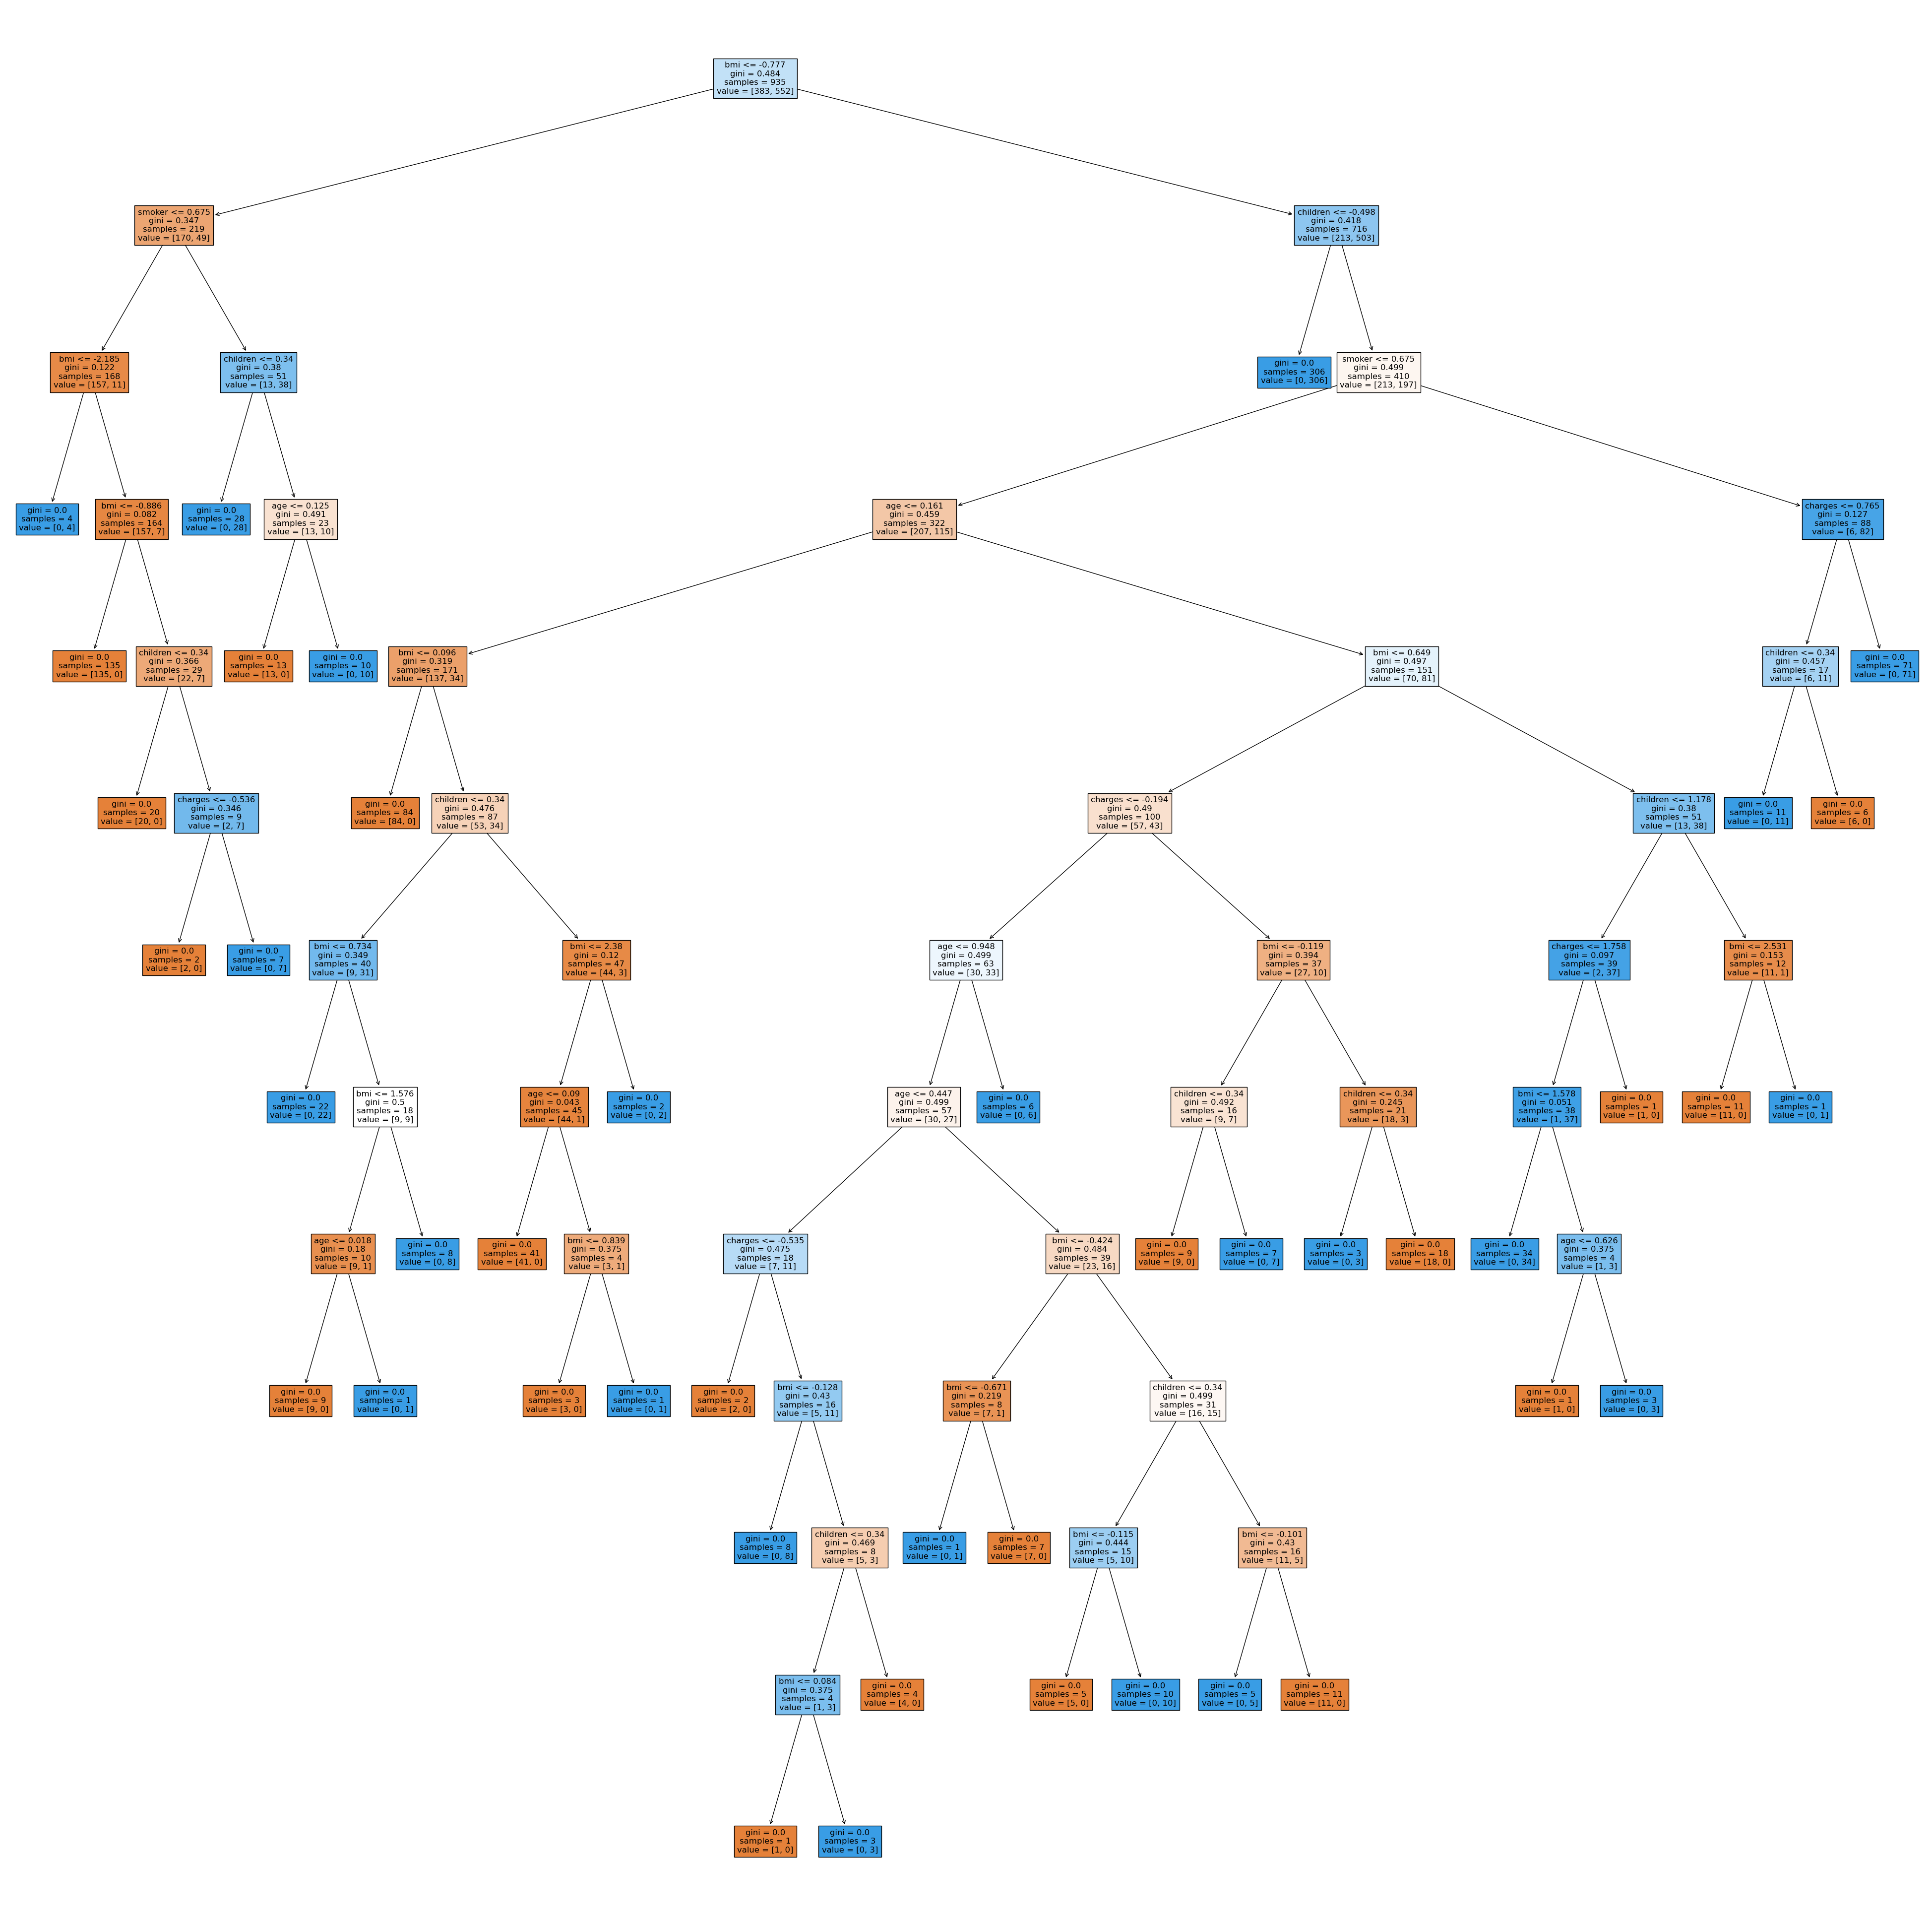

In [45]:
#show tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(50,50))
_=tree.plot_tree(dtc,feature_names=features,filled=True)

#plot_tree() inbuilt method of tree class

In [46]:
#Test the model with 30% data,use inbuilt method predict()
Y_pred=dtc.predict(x_test) #return output of probability's value
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [47]:
#Evaluation of model
#first print confusion matrix
print(confusion_matrix(y_test,Y_pred))

[[168   4]
 [  9 221]]


In [48]:
#generate Classification Report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [49]:
#Use Entropy method
#Create the object of DecisionTreeClassifier class and  passing the parameter
#Caterian='entropy'  bydefault criterion="gini"
dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy')
#Formula of entropy = -p*log(p)-Q*log(Q)

In [50]:
#Train the model with  70% data
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [51]:
#create a  dataframe with the help of dictionary
dict={'Input columns':X.columns,"IG":dtc1.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)

,Input columns,IG
0,bmi,0.448999
1,children,0.268376
2,smoker,0.156672
3,age,0.086761
4,charges,0.039192
5,sex,0.000000
6,region,0.000000


In [52]:
#Test the model with 30% data use inbuilt method predict()
Y_pred=dtc1.predict(x_test)  #return output of probability's value

In [53]:
print(confusion_matrix(y_test,Y_pred))

[[171   1]
 [  4 226]]


In [54]:
#Generate Classification Report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402



In [55]:
#Conclusion : Best mehtod of thos dataset (insurance.csv) is
#DecisionTreeClassifier with entropy
#Recall score =0.98 means 98% and accuracy of model 0.99 means 99%